In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("../data/consumer/conductivity_data.csv")
display(df)
values = df["Value"].values

for i in range(150000, len(values)): #insert a trend into data
    values[i] += +(i-150000)*0.1

values = np.convolve(values, np.ones(100)/100, mode = 'same')

samples = 60*24*4
X = []
for i in range(int(len(values)/samples)):
    X.append(values[i*samples:(i+1)*samples])

,Timestamp,Value
0,2021-02-24 00:00:00,9212.88900
1,2021-02-24 00:00:15,9210.90605
2,2021-02-24 00:00:30,9208.92310
3,2021-02-24 00:00:45,9206.94015
4,2021-02-24 00:01:00,9204.95720
...,...,...
207355,2021-03-31 23:58:45,5931.60400
207356,2021-03-31 23:59:00,5931.60400
207357,2021-03-31 23:59:15,5931.60400
207358,2021-03-31 23:59:30,5931.60400


,timestamp,ftr_vector
0,1.607814e+09,16.8
1,1.607814e+09,16.8
2,1.607814e+09,16.8
3,1.607815e+09,16.9
4,1.607816e+09,17.0
...,...,...
8534,1.615760e+09,17.1
8535,1.615761e+09,17.4
8536,1.615761e+09,17.4
8537,1.615762e+09,17.5


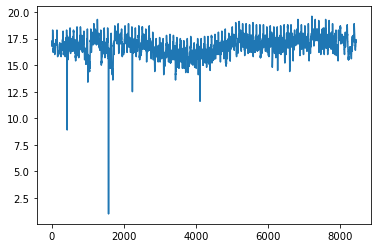

In [161]:
df = pd.read_csv("../data/consumer/braila_pressure5770.csv")

display(df)
values = df["ftr_vector"].values

values = np.convolve(values, np.ones(1)/1, mode = 'same')


#for i in range(6000, len(values)): #insert a trend into data
#    values[i] += -(i-6000)*0.003

samples = 4*24
X = []
for i in range(int(len(values)/samples)):
    X.append(values[i*samples:(i+1)*samples])
    
values = values[:(i+1)*samples]
plt.plot(values)

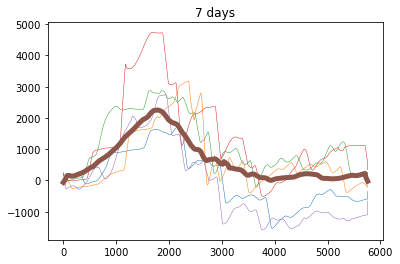

In [188]:
X = np.array(X)
average = np.average(X, axis = 0) - np.average(np.average(X, axis = 0)[:50])

diffs = []

for i in range(3, 8):
    normalized = np.array(X[i]) - np.average(X[i][:50])
    normalized = np.convolve(normalized, np.ones(5)/5, mode = 'same')
    diff = np.add(normalized, -average)
    diffs.append(np.mean(diff))
    plt.plot(normalized, lw = 0.5)
#plt.ylim([-3000, 6000])

#plt.plot(values - np.mean(values))
#plt.plot(range(100, len(values), samples), diffs)
plt.title(str(i) + " days")
plt.plot(average, lw = 5)

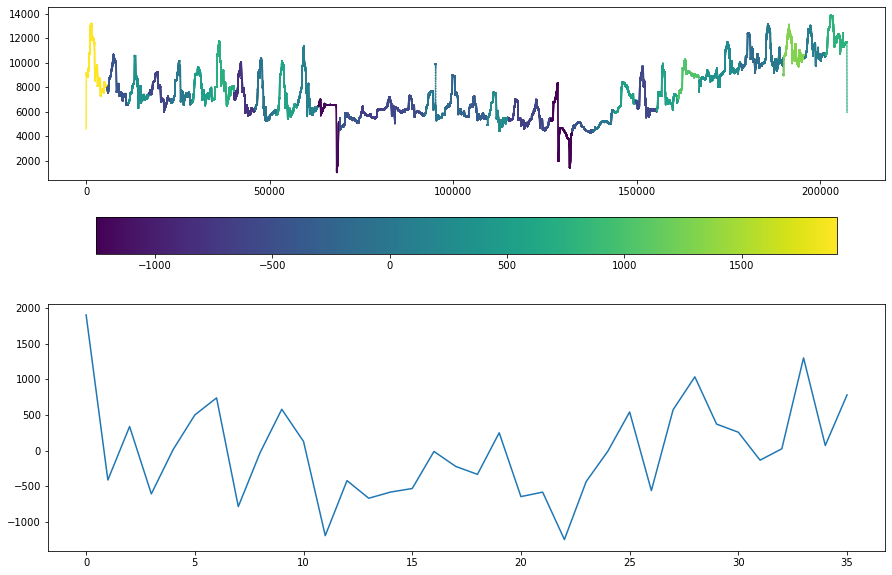

In [185]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
plot = ax[0].scatter(range(len(values)), values, c = np.repeat(diffs, samples), s = 0.3)
fig.colorbar(plot, ax = ax[0], orientation="horizontal")
#ax[0].set_ylim([2000, 14000])
#ax[0].set_ylim([10, 20])
ax[1].plot(diffs)

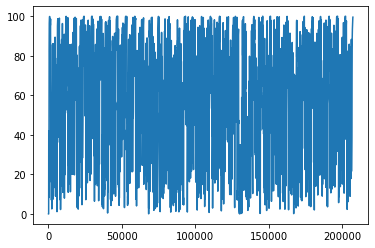